In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import librosa, IPython
import librosa.display as lplt


import warnings
warnings.filterwarnings('ignore')

In [27]:
def mel_rmse(label):
    y_label, sr_label = librosa.load(label)
    audio_label, _ = librosa.effects.trim(y_label)
    S, _ = librosa.magphase(librosa.stft(audio_label))
    S_db=librosa.amplitude_to_db(S, ref = np.max)
    rms = librosa.feature.rms(S = S)
    
    fig, ax = plt.subplots(nrows = 2, sharex = True,figsize = (16, 8))
    
    times = librosa.times_like(rms)
    ax[0].semilogy(times, rms[0], label='RMS Energy')
    ax[0].set(xticks = [])
    ax[0].label_outer()
    ax[0].set(title = 'signal energy')
    
    S_2 = librosa.feature.melspectrogram(y_label, sr_label)
    S_dB_2 = librosa.power_to_db(S_2, ref = np.max)
    img = librosa.display.specshow(S_dB_2, x_axis='time', y_axis='mel', sr=sr_label,fmax=8000, ax=ax[1]) # hop_length = 100
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    
    librosa.display.specshow(S_db, y_axis='log', x_axis='time', ax=ax[1])
    ax[1].set(title = 'Mel-frequency spectrogram')
    plt.show()
    

In [20]:
def waveform(label):
    y,sr = librosa.load(label)
    fig, ax = plt.subplots(1,figsize = (8, 4))
    librosa.display.waveshow(y,sr)
    ax.set(title='waveform')
   
    
def mfcc(label):
    y,sr = librosa.load(label)
    S = librosa.feature.mfcc(y, sr)
    fig, ax = plt.subplots(1,figsize = (10,4))
    img = librosa.display.specshow(S, x_axis='time', ax=ax)
    fig.colorbar(img, ax=ax)
    ax.set(title='MFCC')

In [21]:
sample_audio = "CS4641_Project/GTZAN_model/disco.00001.wav"

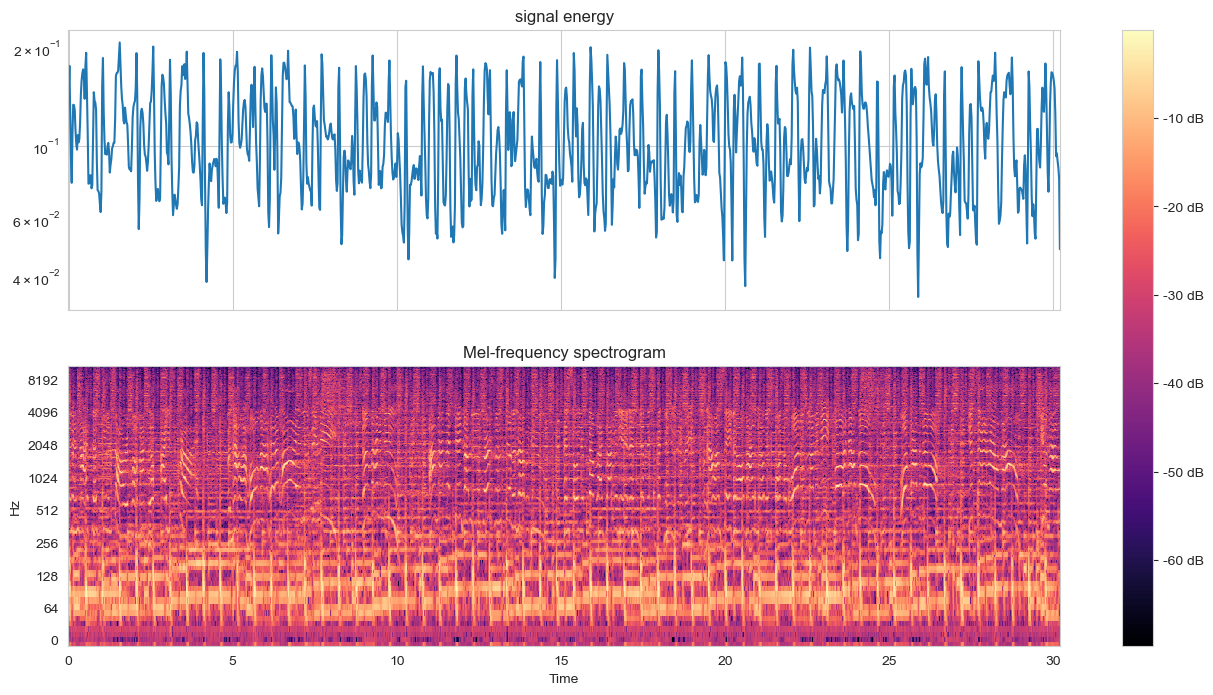

In [28]:
mel_rmse(sample_audio)

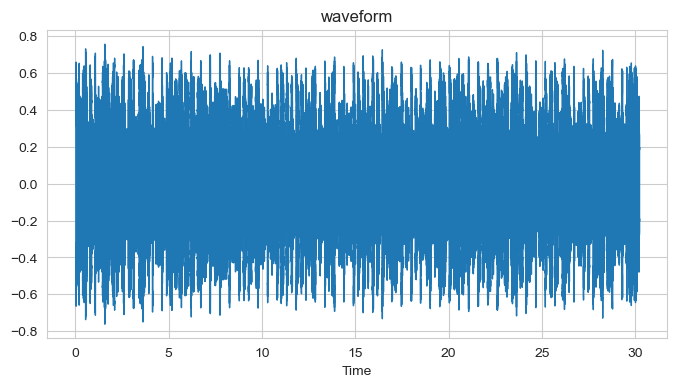

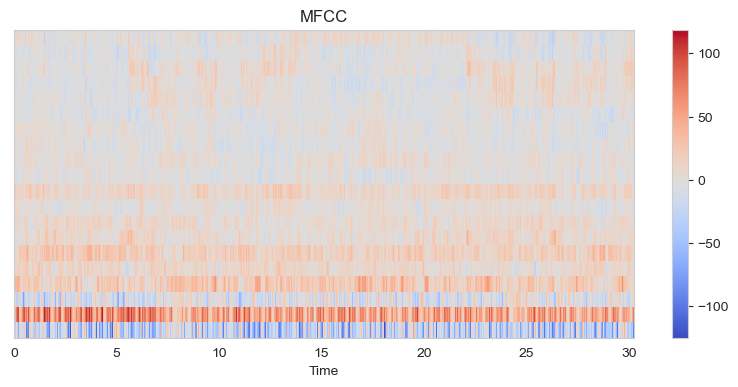

In [22]:
waveform(sample_audio)
mfcc(sample_audio)